# Netflix

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("netflix_titles.csv")
# df.dropna().head(5)
df = df.dropna(subset=["type","release_year","rating","country","duration"])
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


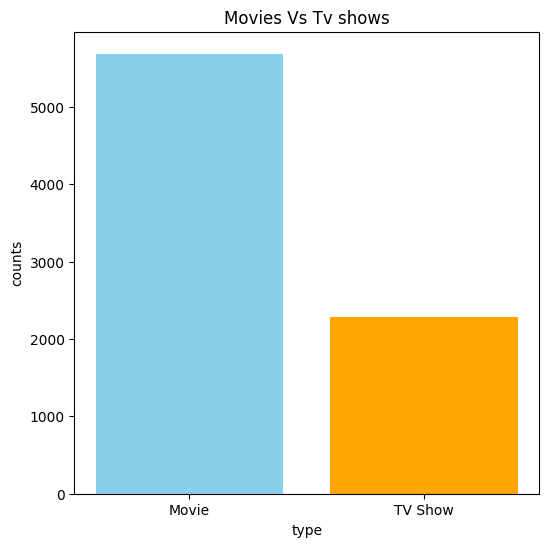

In [76]:
# Question no 1 Movies vs Tv Shows


type_counts = df["type"].value_counts()
plt.figure(figsize=(6,6))
plt.bar(type_counts.index,type_counts.values,color=["skyblue","orange"])
plt.title("Movies Vs Tv shows")
plt.xlabel("type")
plt.ylabel("counts")
plt.savefig("movies_vs_tv.png")
plt.show()


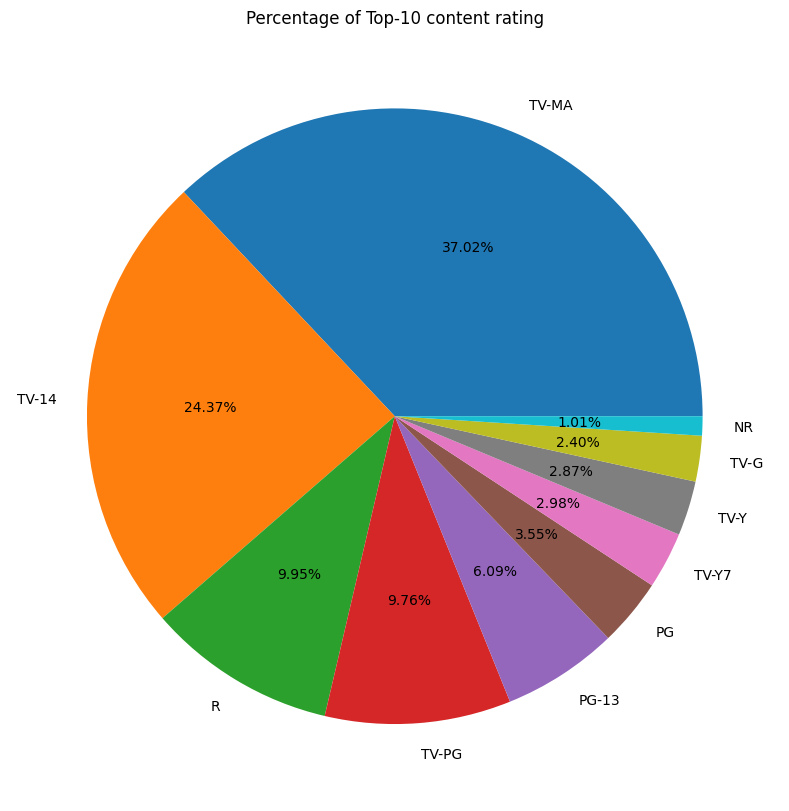

In [7]:
# Q2 What is the percentage of each content rating (PG,R,Tv_MA)

ratings = df["rating"]
ratings_counts = ratings.value_counts().head(10) 
rating_percentage  = (ratings_counts *100)/df
plt.figure(figsize=(8,8))
plt.pie(ratings_counts.values,labels=ratings_counts.index,autopct="%1.2f%%")
plt.tight_layout()
plt.title("Percentage of Top-10 content rating")
plt.savefig("Rating_percentage")
plt.show()

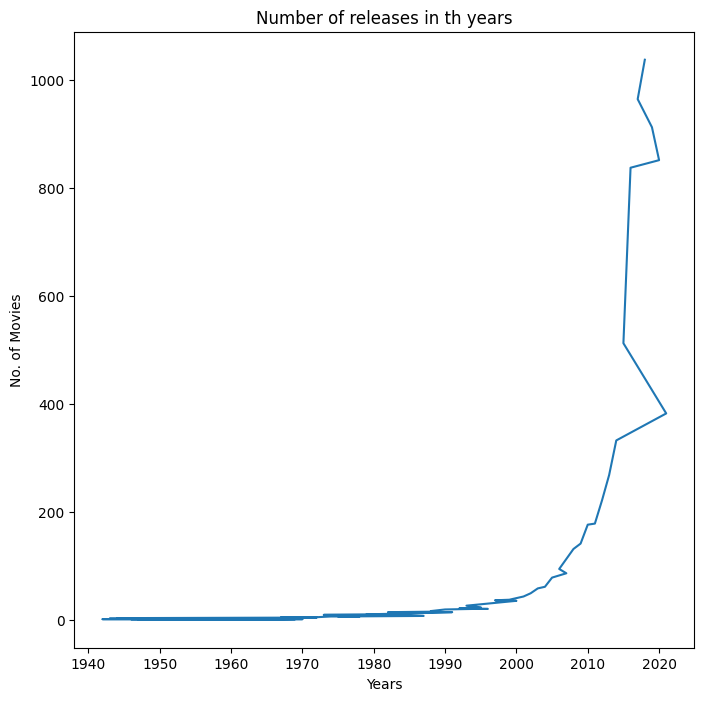

In [8]:
# How has the number of release changed over the years ? 

release_year = df["release_year"].value_counts()
plt.figure(figsize=(8,8))
plt.title("Number of releases in th years")
plt.xlabel("Years")
plt.ylabel("No. of Movies")
plt.plot(release_year)
plt.savefig("Number_of_releases_per_year")

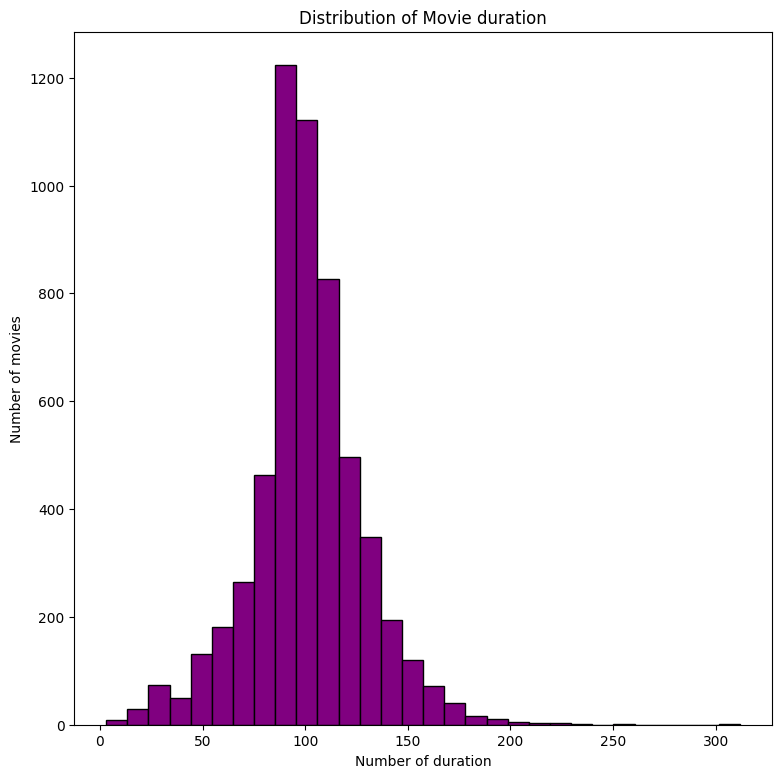

In [12]:
# Q4 What is the distribution of movies duration

movies = df[df["type"]=="Movie"].copy()
movies["duration_int"] = movies["duration"].str.replace(" min","").astype(int)

# OR
# movies.insert(10,"duration_int", movies["duration"].str.replace(" min","").astype(int))


plt.figure(figsize=(9,9))
plt.title("Distribution of Movie duration")
plt.ylabel("Number of movies")
plt.xlabel("Number of duration")
plt.hist(movies["duration_int"],bins=30,color="purple",edgecolor="black")
plt.savefig("Duration of movies")

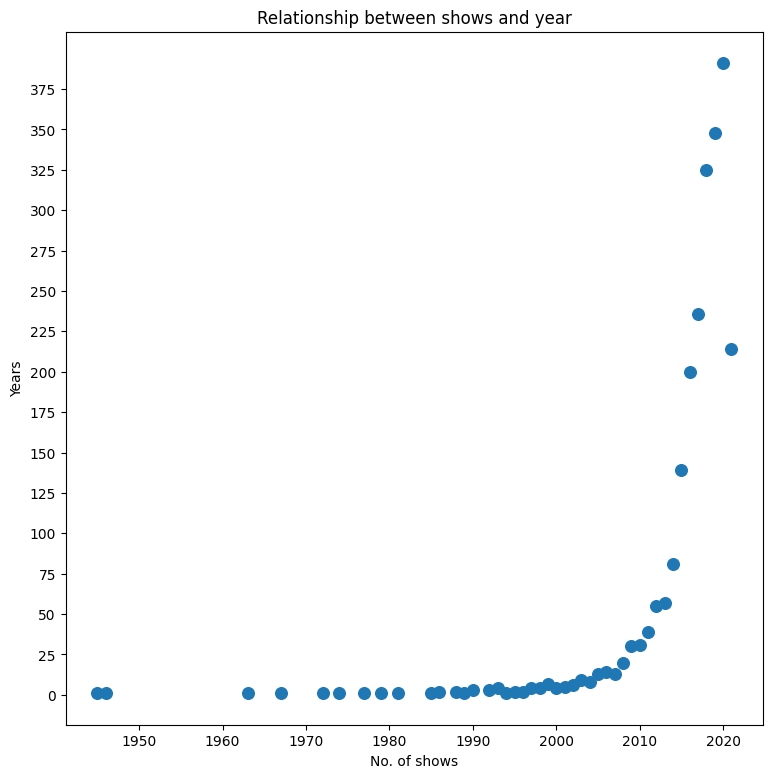

In [46]:
#Q5 Relationship between release year and no.of shows

shows = df[df["type"]=="TV Show"]
release_year = shows["release_year"].value_counts()
plt.figure(figsize=(9,9))
plt.title("Relationship between shows and year")
plt.xlabel("No. of shows")
plt.ylabel("Years")
plt.scatter(release_year.index,release_year.values,s=70)
plt.yticks(np.arange(0,release_year.values.max()-1,step=25))
plt.show()


country
United States     760
United Kingdom    213
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          47
Name: count, dtype: int64


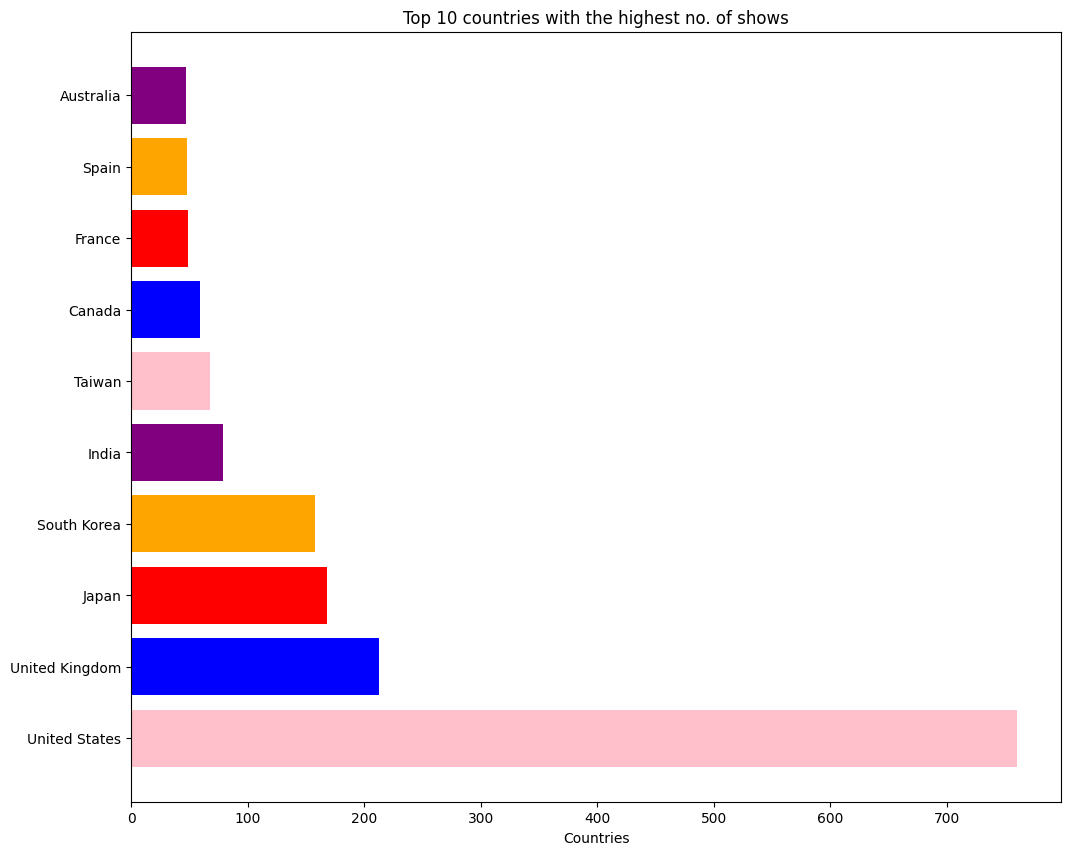

In [79]:
# Q6 Top 10 countries with the highest no. of shows

shows = df[df["type"]=="TV Show"]
shows_country = shows["country"].value_counts()
top_10_country =  shows_country.sort_values(ascending=False).head(10)
print(top_10_country)

plt.figure(figsize=(12,10))
plt.title("Top 10 countries with the highest no. of shows")
plt.xlabel("No of Shows")
plt.xlabel("Countries")
plt.barh(top_10_country.index,top_10_country.values,color=["pink","blue","red","orange","purple"])
plt.savefig("top_10_country_shows")

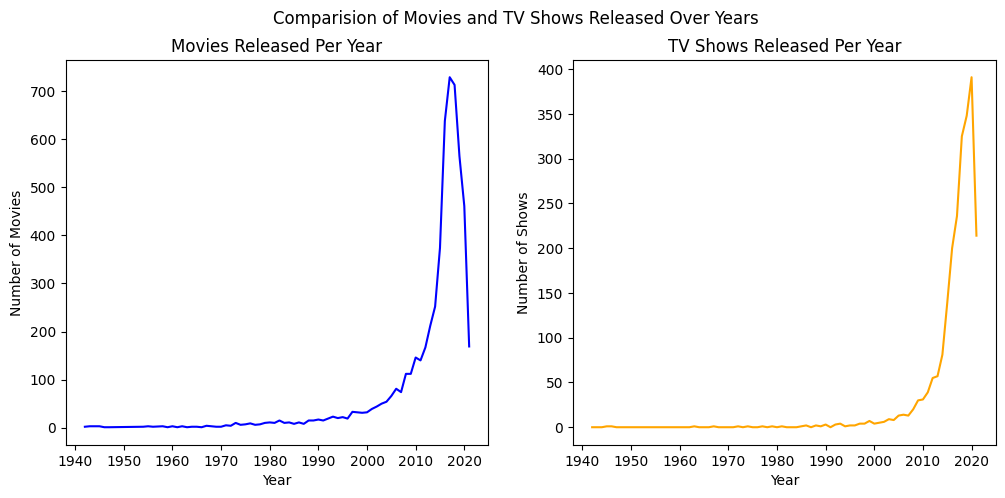

In [80]:
# sub plot tv vs show per year

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize=(12,5))
#first subplot:movies
ax[0].plot(content_by_year. index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot:TV Shows
ax[1].plot(content_by_year. index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Shows')

fig.suptitle("Comparision of Movies and TV Shows Released Over Years")
plt.savefig("Comparision_movies_shows.png")
